# LAB1 - Trabajando con las estadisticas de las opciones sobre el VIX

###### Hablaremos largo y tendido sobre opciones, no tengais la menor duda, pero para empezar, con un articulo, que nos incie en el uso de pandas, el uso de series temporales, y algunas pinceladas sobre finanzas, me parece un buen aperitivo, que marcara la linea que se pretende conseguir en el blog.

**¿Que es una opcion?** Es un contrato, donde el comprador adquiere un DERECHO a cambio de PAGAR un precio , y el vendedor adquiere una OBLIGACION a cambio de PERCIBIR un precio.    
**¿Que tipo de opciones existen?** Existen las put y las call, cada una de ellas, para su ejecucion, necesita un comprador y un vendedor. Y es donde entran en juego los market makers, y la negociacion OTC, cosas que dejaremos para mas adelante.    
**¿Que formatos de opciones existen?** Para mi, solo unas, las americanas, pero en realidad, hay muchisimos tipos, desde las Europeas, Bermuda, las Power, las Barreda, y luego tenemos aberraciones como los warrants o las binarias( donde en <a href='http://unespeculador.com/opciones-binarias-lo-que-la-verdad-esconde/'>este articulo</a> , <a href='https://telegram.me/joinchat/DP9o50A6SYeUKYdmtLJxaQ'>EnricECP</a> habla sobre la esperanza matematica negativa de las opciones binarias)    
**¿Que es el VIX? :** Es el indice que mide la volatilidad de las opciones PUT del S&P 500.  
**¿Que es una opcion CALL? :** Es un derivado financiero, el cuall el comprador de la opcion, sale beneficiado con las subidas, y el vendedor de la opcion, sale beneficiado con las caidas.   
**¿Que es una opcion PUT? :**  Es un derivado financiero, el cuall el comprador de la opcion, sale beneficiado con las caidas, y el vendedor de la opcion, sale beneficiado con las subidas, o los escenarios laterales (tema que trataremos en otro estudio)  

# 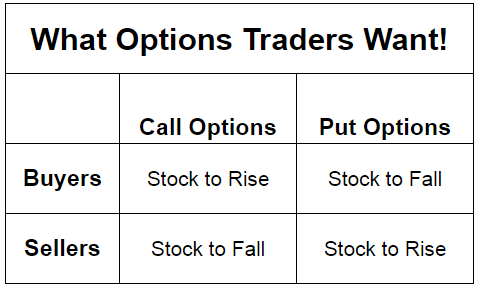

#### Cargamos todas las librerias necesarias 

In [2]:
import pandas as pd # esperemos que pronto sea import MODIN as pd.
import numpy as np 
import seaborn as sns
import scipy 
import datetime 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12 
plt.style.use('ggplot')

/home/pylab/pythonlabs_01/pythonlabs/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### Cargamos nuestro archivo pickle, con los datos previamente cargados

In [3]:
data = pd.read_pickle('/home/pylab/pythonlabs_01/pythonlabs/datasets/pickle/VIX_Stats.pickle')

### Realizamos un analisis exploratorio de los datos

In [4]:
data.shape ## ( filas,columnas)

(304, 8)

In [5]:
data.index # indice del dataframe

DatetimeIndex(['2018-01-02', '2018-05-16', '2018-01-19', '2018-04-10',
               '2019-01-30', '2018-05-10', '2018-10-10', '2018-02-01',
               '2018-11-21', '2018-06-04',
               ...
               '2018-10-08', '2018-01-04', '2019-03-14', '2019-01-07',
               '2019-01-29', '2018-10-18', '2018-11-14', '2018-08-06',
               '2018-05-02', '2018-11-29'],
              dtype='datetime64[ns]', name='quotedate', length=304, freq=None)

In [6]:
data.columns # columnas del dataframe

Index(['symbol', 'calliv', 'calloi', 'callvol', 'putiv', 'putoi', 'putvol',
       'meaniv'],
      dtype='object')

In [7]:
data.head(5) # comprobamos integridad de los datos

,symbol,calliv,calloi,callvol,putiv,putoi,putvol,meaniv
quotedate,,,,,,,,
2018-01-02,VIX,1.7990,7911657.0,474007.0,0.1765,1973447.0,134049.0,0.9878
2018-05-16,VIX,1.2146,6510396.0,351323.0,0.4793,2390787.0,100156.0,0.8470
2018-01-19,VIX,1.4848,8290013.0,320794.0,0.5489,1816758.0,225070.0,1.0168
2018-04-10,VIX,0.7967,5599924.0,501640.0,1.2191,2522041.0,141925.0,1.0079
2019-01-30,VIX,1.1035,5792940.0,158592.0,0.7216,1643864.0,175943.0,0.9125


## El indice no es correcto, pues las fechas no estan ordenadas.

In [8]:
data = data.sort_values(by='quotedate', ascending=True) ## Comprobamos siempre la intregridad de los datos, en este caso, al ser extraido de una base mayor, no estaba ordenado)

In [9]:
data.head(10)

,symbol,calliv,calloi,callvol,putiv,putoi,putvol,meaniv
quotedate,,,,,,,,
2018-01-02,VIX,1.7990,7911657.0,474007.0,0.1765,1973447.0,134049.0,0.9878
2018-01-03,VIX,0.0000,32282656.0,1775860.0,0.0000,8011824.0,1175408.0,0.0000
2018-01-04,VIX,0.0000,32778204.0,1935276.0,0.0000,8362104.0,1577264.0,0.0000
2018-01-05,VIX,0.0000,34095000.0,2288688.0,0.0000,9026580.0,908536.0,0.0000
2018-01-08,VIX,0.0000,35199628.0,4845204.0,0.0000,9507436.0,445232.0,0.0000
2018-01-09,VIX,1.5394,9825711.0,476051.0,0.3580,2411212.0,90019.0,0.9487
2018-01-10,VIX,1.7448,9692405.0,2194289.0,0.3122,2415311.0,678124.0,1.0285
2018-01-11,VIX,1.8422,9681042.0,794356.0,0.1790,2421078.0,172117.0,1.0106
2018-01-12,VIX,1.6882,10345706.0,953906.0,0.2745,2522063.0,262989.0,0.9814


**¿Que es la IV?** : La una prediccion realizada por consenso de mercado sobre el grado que el activo subyacente fluctuara en el futuro. Se estima en tiempo real, y la mas certera suele ser la que te proporciona el propio broker que operas    
**¿Que es el OI?** Interes en abrir contratos, se utiliza para intuir las posiciones de los participantes, y dependiendo de la cola, deberiamos poder predecir, direccion del activo.   
**¿Que es el VOL?** Cuando una order se ejecuta , forma parte del volumen. Es como la medida de los contratos negociados por unidad de tiempo.

En el proximo ariticulo, añadiremos la serie mas impoortante a nuestro data frame, y seguiremos adaptando el data frame a nuestras necesidades.